# Marketing_AB Project

>Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

>**The companies are interested in answering two questions:**
    1. Would the campaign be successful?
    2. If the campaign was successful, how much of that success could be attributed to the ads?**

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

>>Data dictionary:
    1. Index: Row index
    2. user id: User ID (unique)
    3. test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
    4. converted: If a person bought the product then True, else is False
    5. total ads: Amount of ads seen by person
    6. most ads day: Day that the person saw the biggest amount of ads
    7. most ads hour: Hour of day that the person saw the biggest amount of ads


## First I will import the needed libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

## Reading the dataset

In [2]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Assessing and Cleaning part

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [4]:
# There is no duplicate data
df['user id'].duplicated().sum()

0

In [5]:
# There is no Null values
df.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

## Analysis part

In [6]:
df.groupby("test group")["converted"].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

>> **We see that the people who saw the advertisement are most likely to converted, but we are not sure. So we will execute the A/B test, to make sure whether the people who saw the advertisement are most likely to converted or not**

### A/B test part

#### The Hypothese of our test

$H_0: \mu_C \geq \mu_T$

$H_1: \mu_C < \mu_T$

In [7]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [8]:
n_treatment= df[df['test group']== "ad"].shape[0]
n_control= df[df['test group']== "psa"].shape[0]
p_treatment = df[(df['test group']== "ad")& df["converted"] == True].shape[0]
p_control = df[(df['test group']== "psa")& df["converted"] == True].shape[0]
n_treatment, n_control, p_treatment, p_control

(564577, 23524, 14423, 420)

In [9]:
stats, P_value = proportions_ztest([p_treatment, p_control], [n_treatment, n_control], alternative = "larger")
stats, P_value

(7.3700781265454145, 8.526403580779863e-14)

>>**From the z test, we reject the null hypothesis (because the p-value is less than 0.05). So now, we sure that the people who saw the advertisement are most likely to convert compared others**

### Executing the A/B test by using its algorithm

In [10]:
boot = []
for x in range(1000):
    d = df.sample(frac = 1, replace = True).groupby('test group')['converted'].mean()
    boot.append(d)

In [11]:
boot= pd.DataFrame(boot)

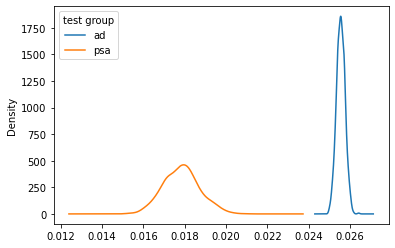

In [12]:
boot.plot.kde()

In [13]:
boot['diff']= boot['ad'] - boot['psa']
boot.head()

test group,ad,psa,diff
converted,0.025623,0.018034,0.007588
converted,0.025536,0.016335,0.009201
converted,0.025270,0.017265,0.008004
converted,0.025954,0.017018,0.008936
converted,0.025650,0.017320,0.008330


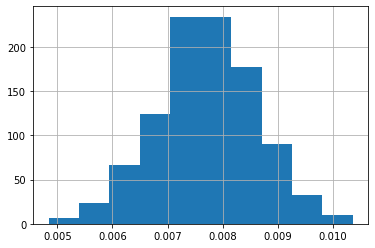

In [14]:
boot['diff'].hist()

In [15]:
(boot['diff']<0).mean()

0.0

In [16]:
boot['diff'].mean()

0.007709355012308587

>>**The results of applying the A/B test algorithm are the same as the results of the z test, we reject the null hypothesis. The people who saw the advertisement group is most likely to convert compared to others.**

>> **From our analysis, we see the campaign will be successful**

>>**The advertisements will increase the the chances of people to converted by almost 1%**